### Importing data to a SQL database

Once you have a database up and running, one of the tasks you'll do most often is import data into a new or existing table. There are many different ways to do this. Here we illustrate how you can use some simple Python packages to connect to the database and import the Seattle Crimes csv file.


#### import the libraries
We will use [pandas](pandas.pydata.org) which is a fantastic data analysis toolkit that happens to have some very simple methods for moving data to and from a database. The datbase connections are handled through pandas using [sqlalchemy](www.sqlalchemy.org).

In [1]:
import pandas as pd
from sqlalchemy import create_engine
import sqlalchemy.types as types

#### connecting to the database
Our next step is to pass some database connection information to pandas/sqlalchemy so that we can establish a connection. We create a database "engine" object that is then used in subsequent operations as a portal to/from the database.

In [2]:
host = 'dssg2016.cel0foggtnsk.us-east-1.rds.amazonaws.com'
#user = 'dssg_student'
#password = 'dssg2016'
user = 'awsdssg'
password = 'datascience2016'
port = '5432'
dbname = 'dssg2016'

#instantiate engine to interface with database
engine = create_engine('postgresql://' + user + ':' + password + '@' + host + ':' + port + '/' + dbname)


#### issue a SQL command to test the connection

In [16]:
crimesData = pd.read_csv('SeattleCrimeIncidents.csv')

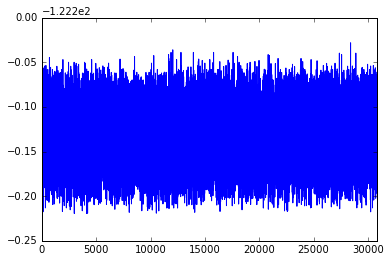

In [8]:
%matplotlib inline
crimesData.Longitude.plot()


In [30]:
# this failed using Pandas
crimesData[0:1].to_sql('crimes',engine,
        dtype={'Offense Code':types.String(),
         'Offense Code Extension':types.Integer(),
         'Offense Type':types.String(),
         'Summary Offense Code':types.String(),
         'Summarized Offense Description':types.String(),
         'Date Reported':types.DateTime(),
         'Occurred Date or Date Range Start':types.DateTime(),
         'Occurred Date Range End':types.DateTime(),
         'Hundred Block Location':types.String(),
         'District/Sector':types.String(),
         'Zone/Beat':types.String(),
         'Census Tract 2000':types.Float(),
         'Longitude':types.Float(),
         'Latitude':types.Float(),
         'Month':types.Integer(),
         'Year':types.Integer()},
                 chunksize = 2000)


In [31]:
# generate primary key
engine.execute("ALTER TABLE seattlecrimeincidents ADD COLUMN gid SERIAL;")
engine.execute("UPDATE seattlecrimeincidents SET gid = nextval(pg_get_serial_sequence('crimes','gid'));")
engine.execute("ALTER TABLE seattlecrimeincidents ADD PRIMARY KEY(gid);")

In [3]:
# add geometry and generate from lat/long
engine.execute("ALTER TABLE seattlecrimeincidents ADD COLUMN geom geometry(Point, 4326);")


In [7]:
engine.execute("""UPDATE seattlecrimeincidents SET geom = ST_setSRID(ST_MakePoint("Longitude","Latitude"),4326);""")